In [ ]:
pip install numpy pandas matplotlib

In [ ]:
pip install seaborn scipy warnings

In [ ]:
pip install streamlit

In [ ]:
pip install sklearn

In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


#For Plotting
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix 
from scipy.stats import gaussian_kde


#For Machine Learning Algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [3]:
df = pd.read_csv('/Users/thejakamahaulpatha/PycharmProjects/Diabetese/Datasets/diabetes.csv')

In [ ]:
######### Descriptive Analysis #########

In [4]:
df.shape

(2000, 9)

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [8]:
df.Pregnancies.unique()

array([ 2,  0,  1,  4,  8,  3,  6,  5,  7, 10, 12,  9, 11, 13, 15, 17, 14])

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [10]:
######### Descriptive Analysis with plotting #########

In [11]:
######### 1. Histrograms

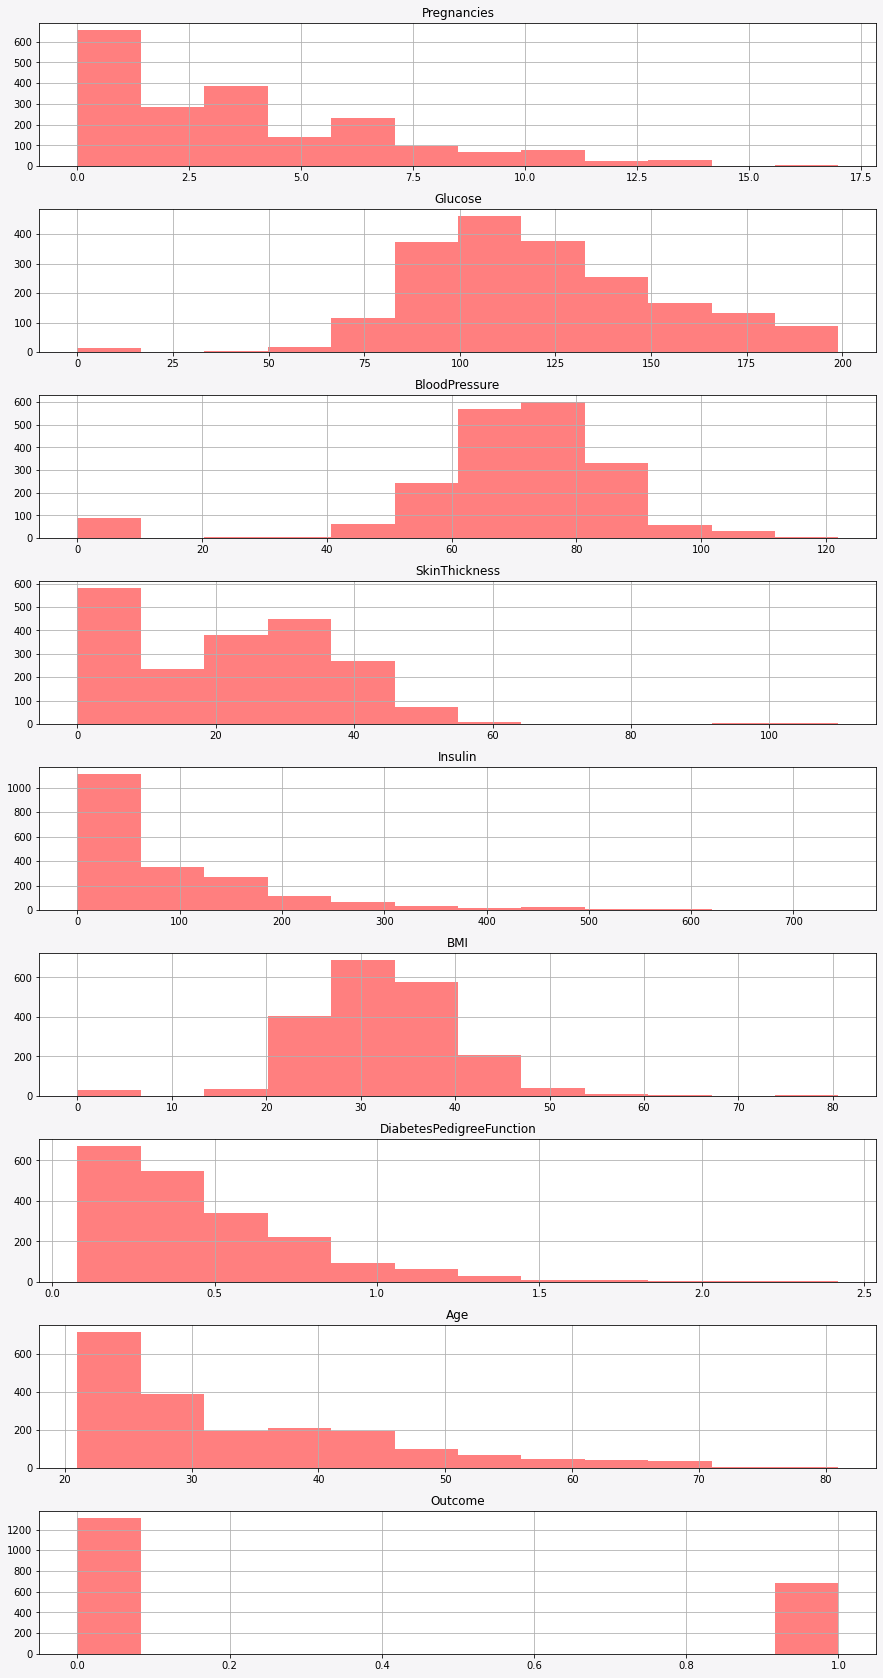

In [12]:
fig, ax = plt.subplots(9,figsize=(15,30))
fig.patch.set_facecolor('#f6f5f7')
# ax.set_facecolor('#f6f5f5')

for i in range(9):
    df.hist(column=df.columns[i],bins=12, ax=ax[i], alpha=0.5, color='red')

In [13]:
######### Another way of showing the histrograms 

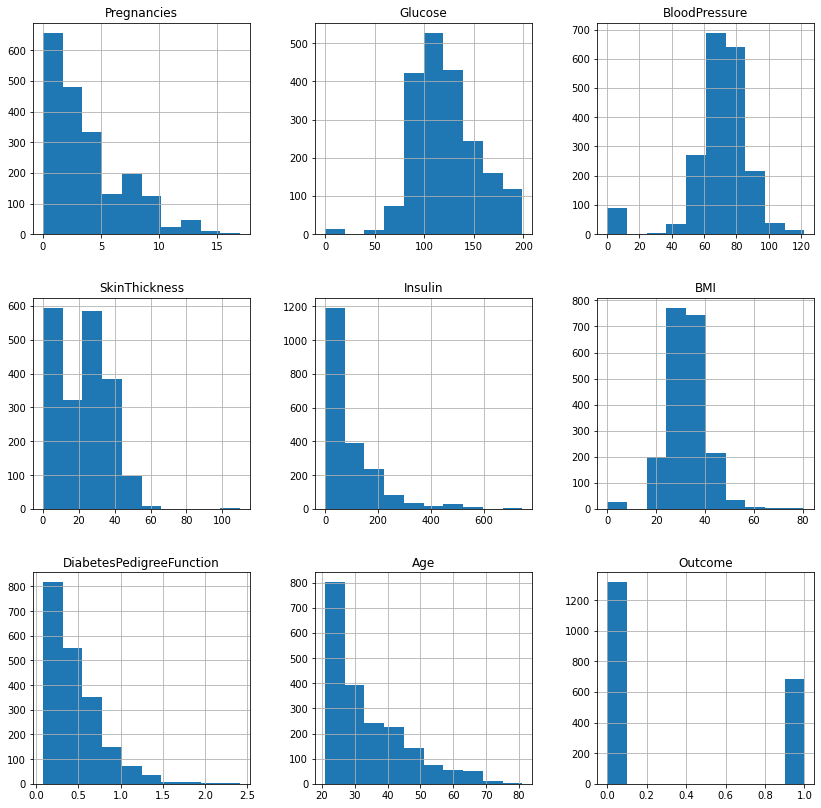

In [14]:
numbers = pd.Series(df.columns)
df[numbers].hist(figsize = (14, 14))
plt.show();

In [15]:
######### 2. Boxplots

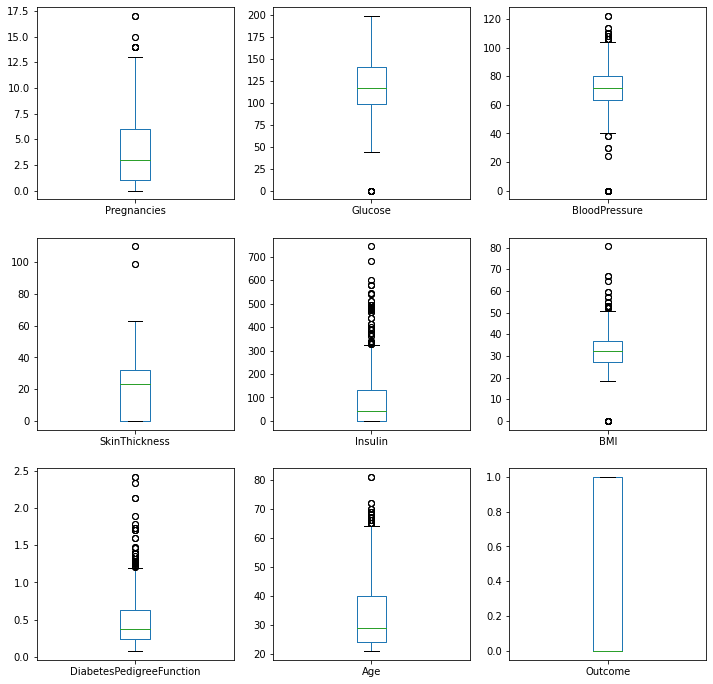

In [16]:
df.plot(kind = 'box', subplots = True, layout = (3, 3), sharex = False, sharey = False, figsize = (12, 12));

In [17]:
######### 3. Density Plots

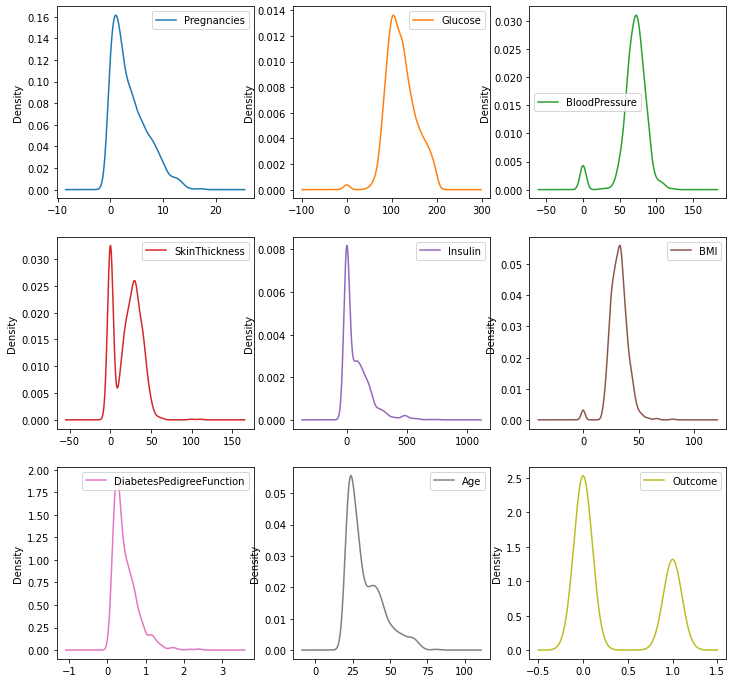

In [18]:
df.plot(kind = 'density', subplots = True, layout = (3, 3), sharex = False, sharey = False, figsize = (12, 12));

In [19]:
######### 4. Scatter Matrix and Scatter Plots

array([[<AxesSubplot:xlabel='Pregnancies', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='Glucose', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='BloodPressure', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='SkinThickness', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='Insulin', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='BMI', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='Age', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>],
       [<AxesSubplot:xlabel='Pregnancies', ylabel='Glucose'>,
        <AxesSubplot:xlabel='Glucose', ylabel='Glucose'>,
        <AxesSubplot:xlabel='BloodPressure', ylabel='Glucose'>,
        <AxesSubplot:xlabel='SkinThickness', ylabel='Glucose'>,
        <AxesSubplot:xlabel='Insulin', ylabel='Glucose'>,
        <AxesSubplot:xlabel='BMI', ylabel='Glucose'>,
        <AxesSubplot:xlabel='DiabetesPedigreeFunction', 

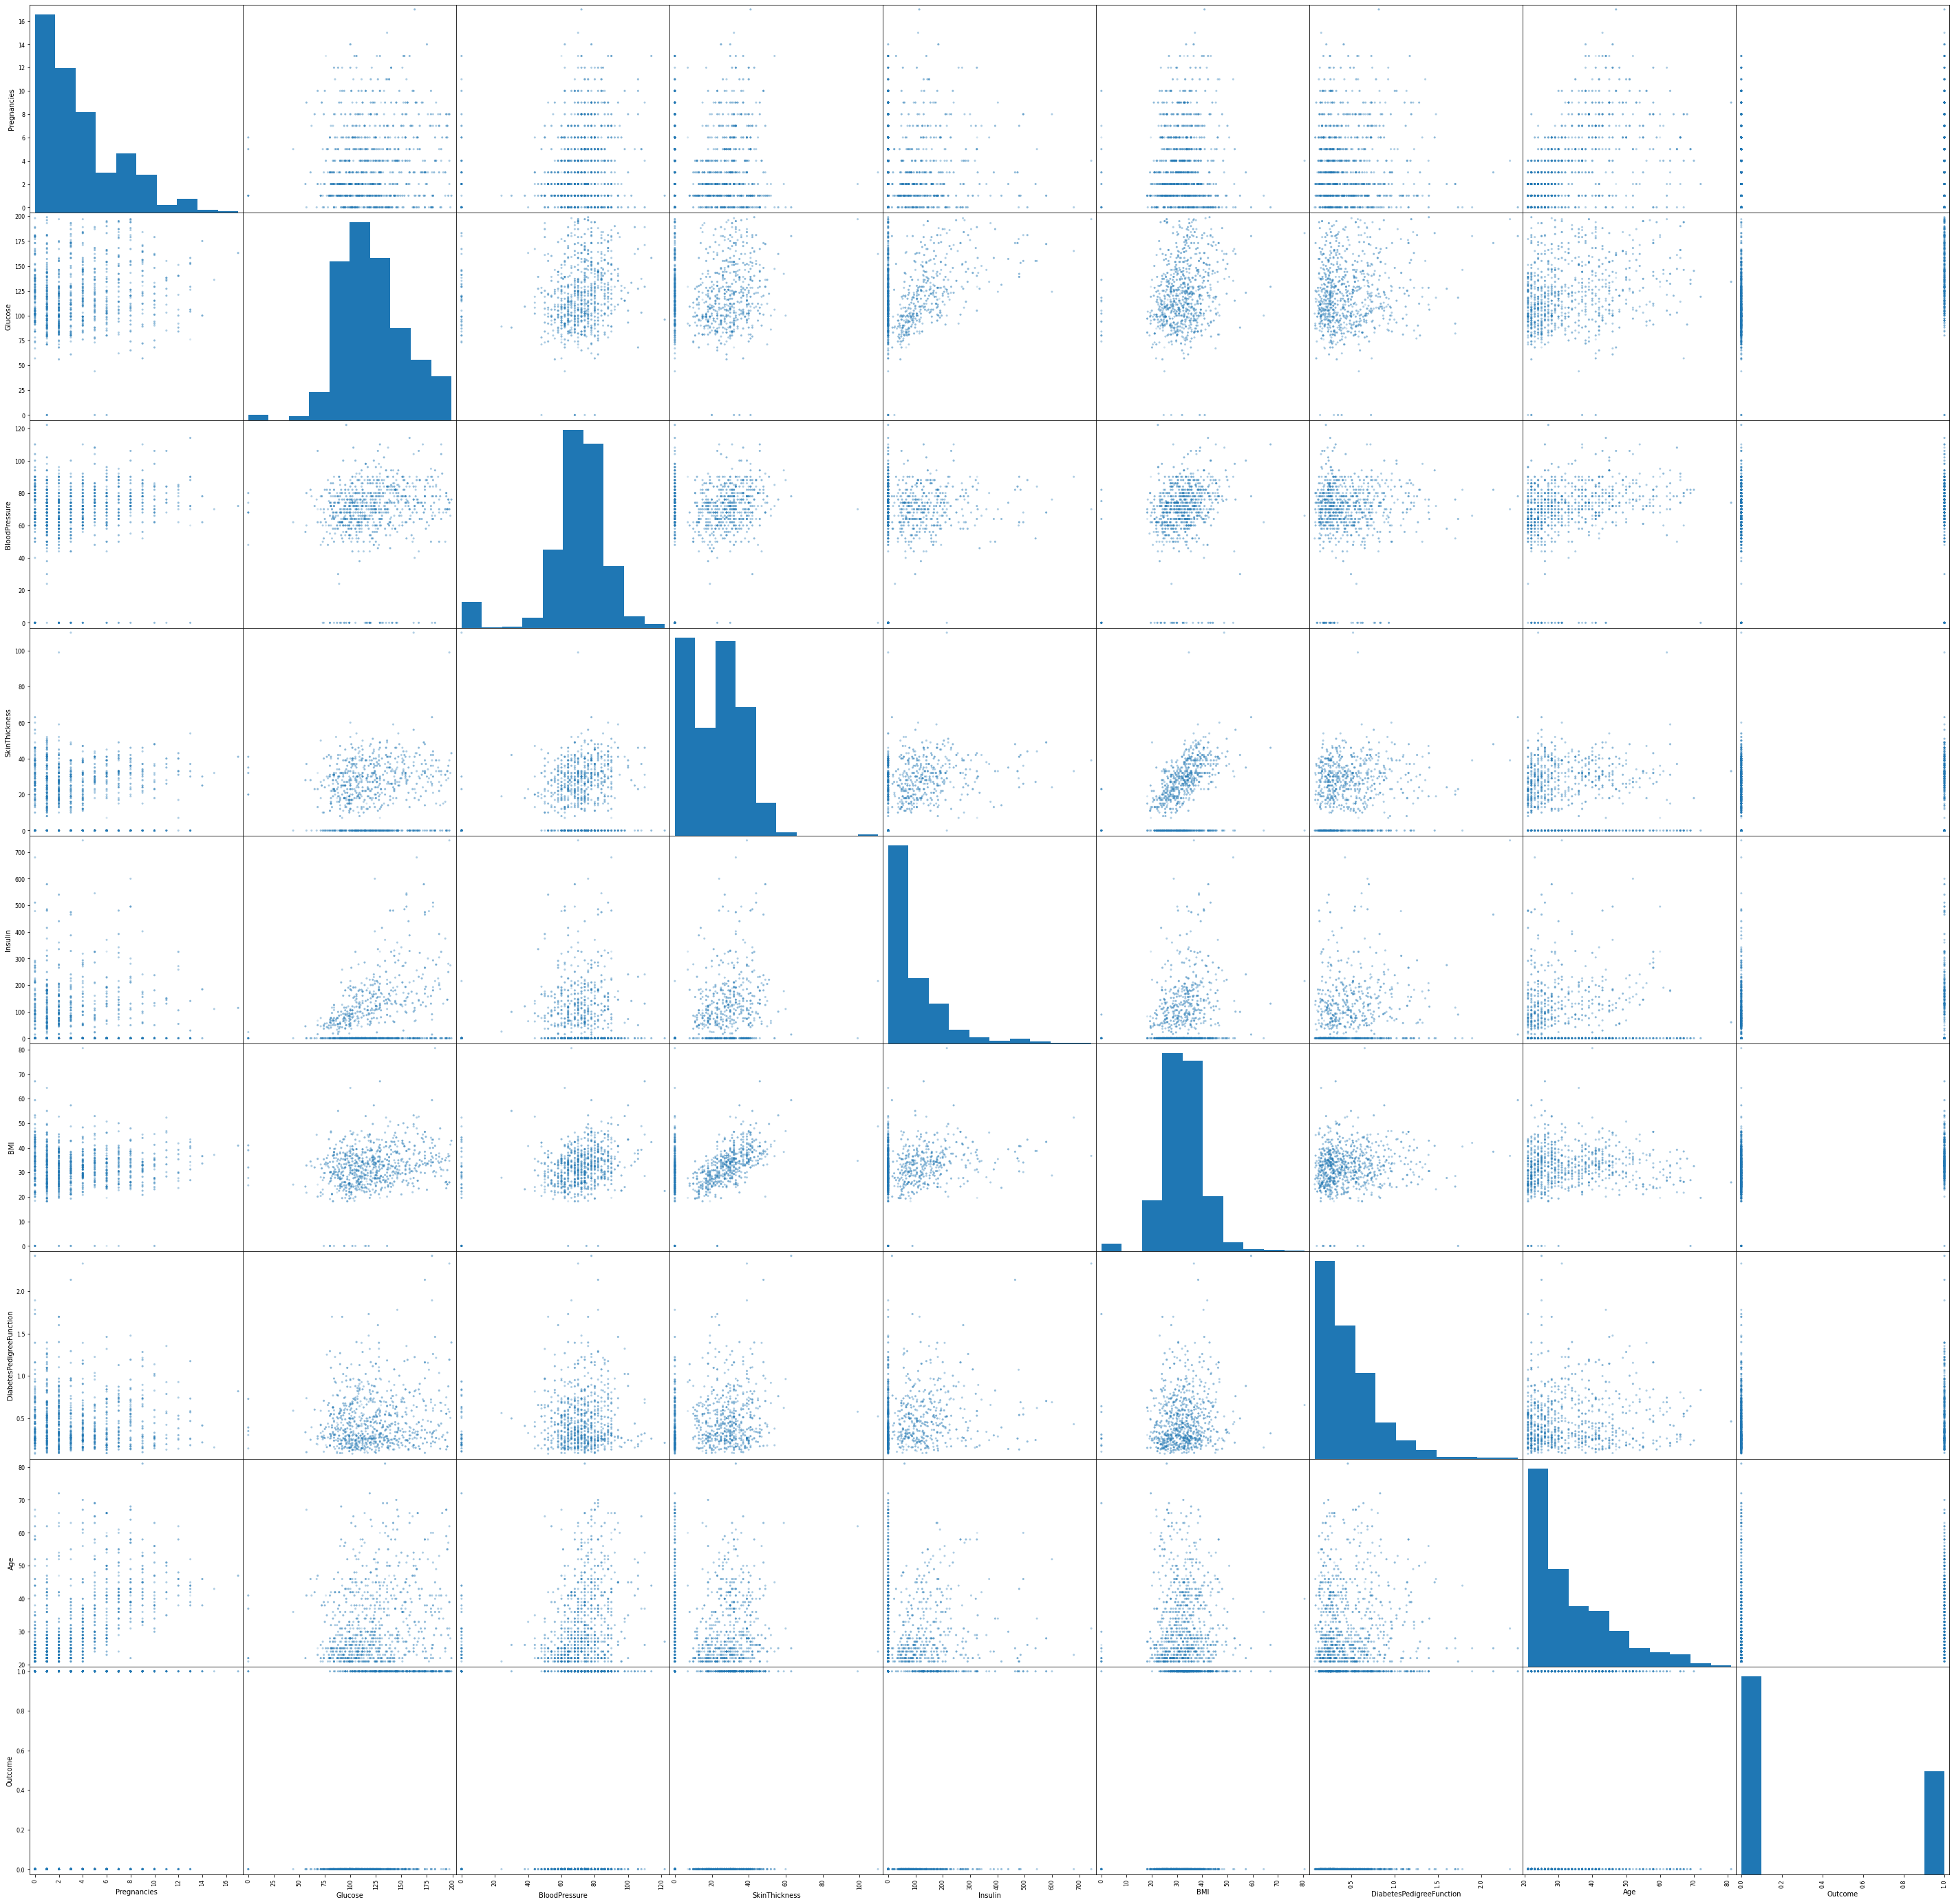

In [21]:
scatter_matrix(df, alpha = 0.2, figsize = (50, 50))       

In [22]:
######### A better way to do the same

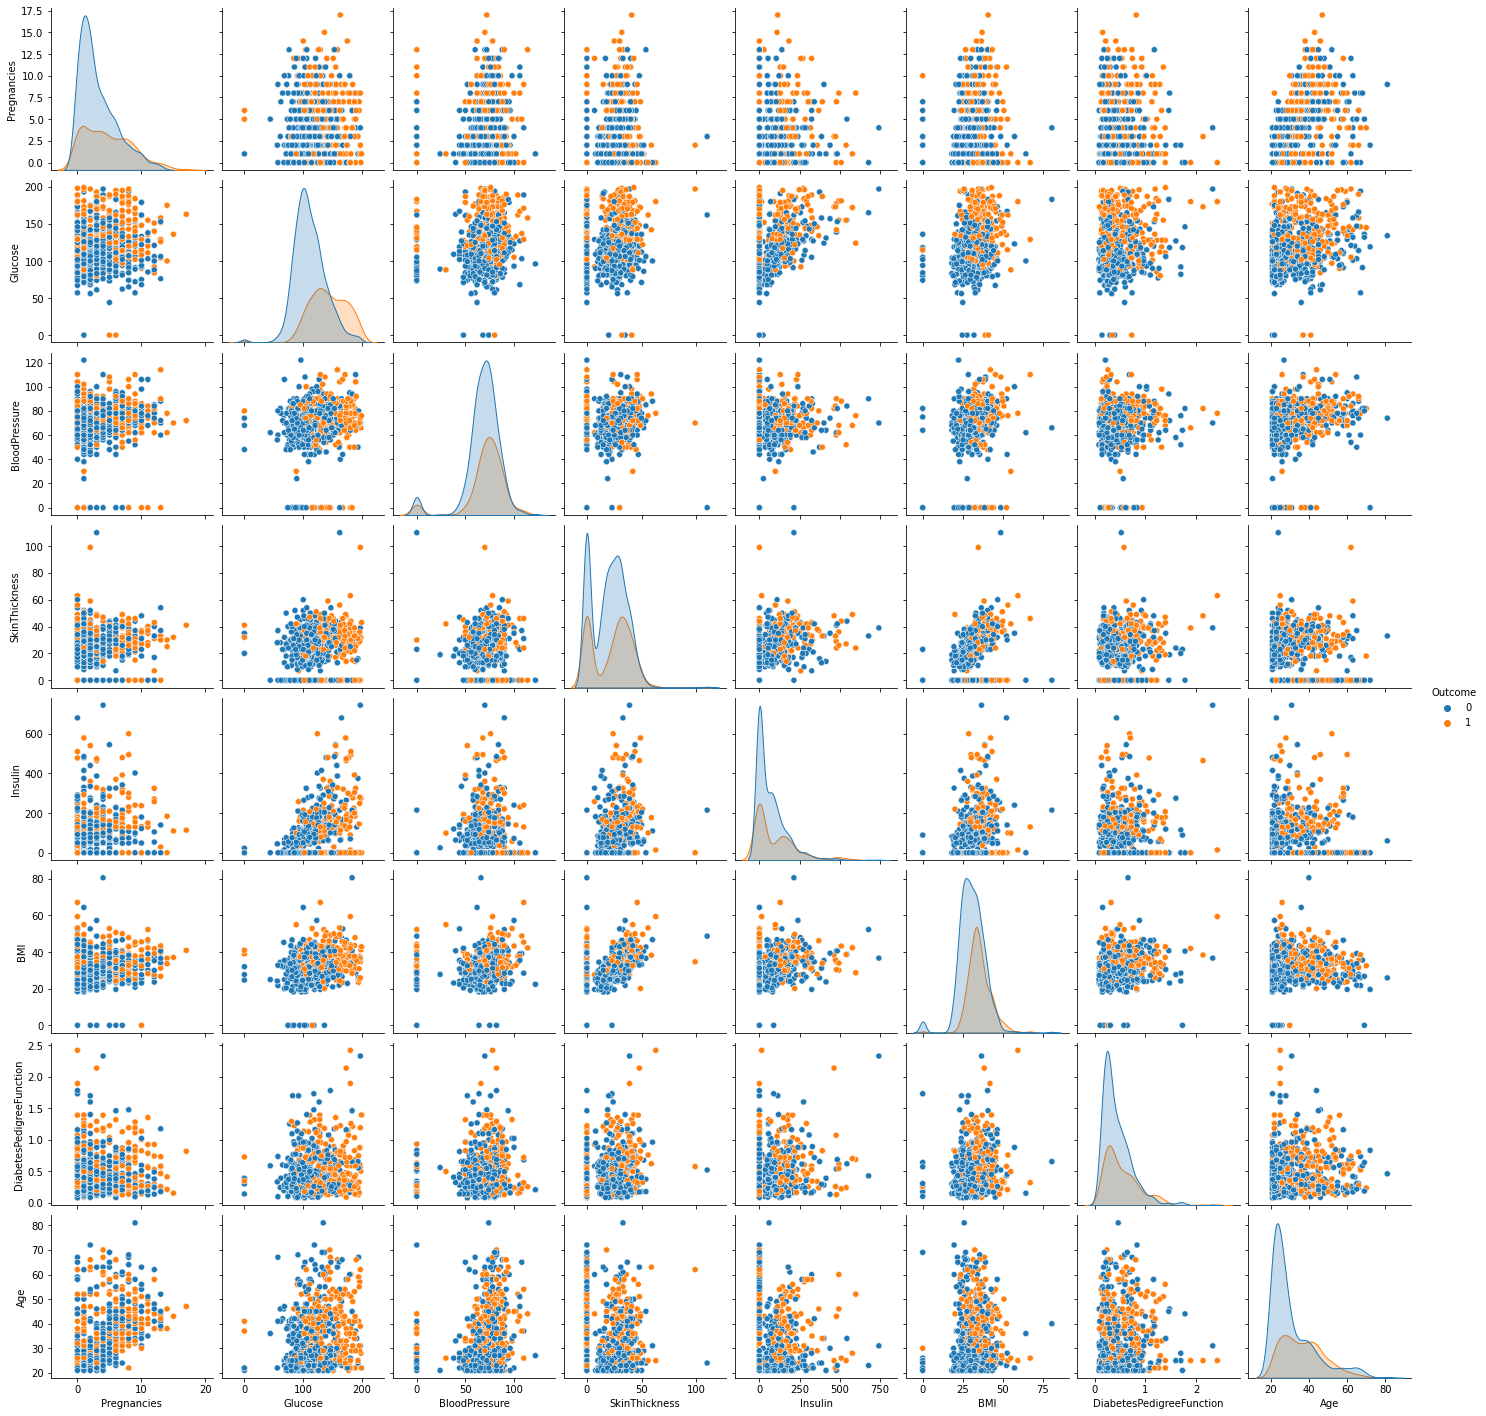

In [23]:
sns.pairplot(df, hue = "Outcome");

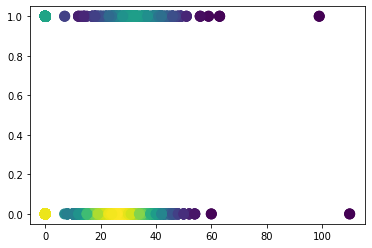

In [24]:
x = df['SkinThickness']
y = df['Outcome']

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

plt.scatter(x, y, c=z, s=100)
plt.show()

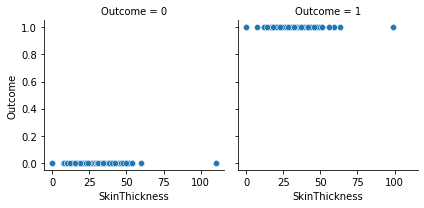

In [25]:
g = sns.FacetGrid(df, col = 'Outcome')
g.map(sns.scatterplot, 'SkinThickness','Outcome')

In [26]:
#Comparing the means of SkinThickness based on Outcome 

a = df[(df["Outcome"] == 0)]
b = df[(df["Outcome"] == 1)]

print(a['SkinThickness'].mean(),b['SkinThickness'].mean())


# We can see that the mean of Skinthickness where the Outcome is 1 has a greater value. 

20.05243161094225 22.633040935672515


In [27]:
#Checking how many null values are in the SkinThickness column. 

df.SkinThickness.count()

c = df[df['SkinThickness']==0]
count  = c.SkinThickness.count()

avg_skinThickness = count / df.SkinThickness.count()

print(avg_skinThickness*100)


28.65


In [28]:
#Comparing the means of SkinThickness based on Outcome but excluding '0' in Skinthickness as there are 28% values of 0s 

a = df[(df["Outcome"] == 0) & (df["SkinThickness"] > 0)]
b = df[(df["Outcome"] == 1) & (df["SkinThickness"] > 0)]

print(a['SkinThickness'].mean(),b['SkinThickness'].mean())


27.488541666666666 33.149892933618844


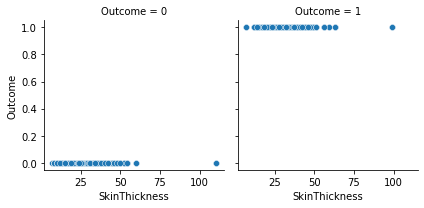

In [29]:
n = df[df["SkinThickness"]>0]

g = sns.FacetGrid(n, col = 'Outcome')
g.map(sns.scatterplot, 'SkinThickness','Outcome')


In [30]:
######### 5. Heatmaps

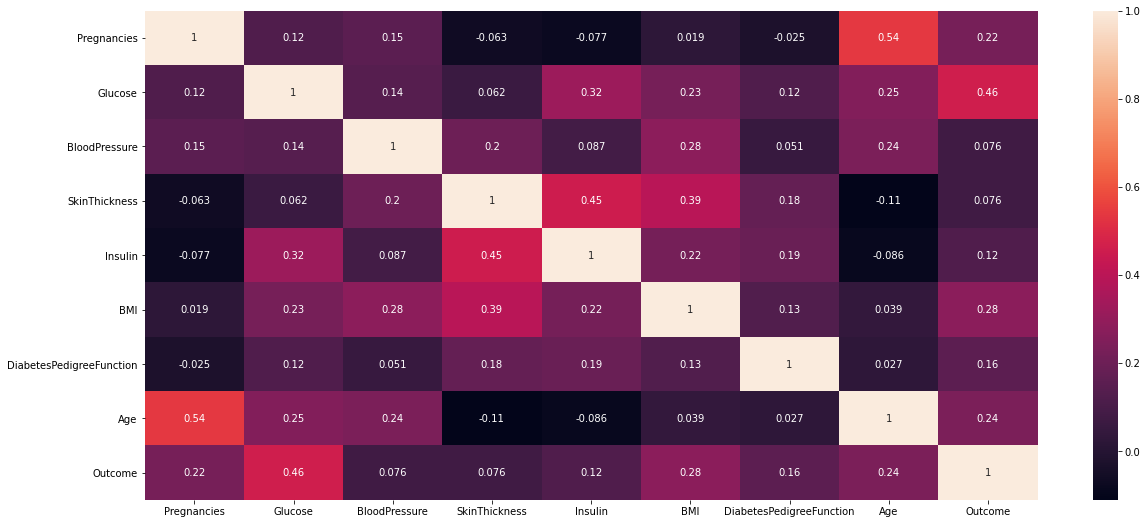

In [31]:
# See the correlation of the variables using a Heatmap
corr = df.corr()
f, ax = plt.subplots(figsize = (20, 9))
sns.heatmap(corr, vmax = 1, annot = True);

In [32]:
######### Implementing Machine Learning Model
# We will use a RandomForestClassification

In [33]:
# 1. Let's split the data

x = df.iloc[:,0:8].values
y = df.iloc[:,-1].values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1) 

In [34]:
#2. Fitting the date to the model

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [35]:
# Predicting on the test data to see the accuracy of the mode

round(float(accuracy_score(y_test,rfc.predict(x_test)))*100)

97

In [36]:
######### Let's test some more Algorithms 

In [37]:
#Creating a list with the models
models = []
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('RFC',RandomForestClassifier()))
models.append(('SVM',SVC(gamma='auto')))

In [38]:
# Evaluate each model in turn
results = []
names = []

for name,model in models:
    kfold = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
    cv_results = cross_val_score(model,x_train,y_train,cv=kfold,scoring='accuracy')
#     print(cv_results)
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)'%(name,cv_results.mean(),cv_results.std()))


LR: 0.774000 (0.014742)
LDA: 0.774000 (0.020753)
KNN: 0.776000 (0.033625)
CART: 0.959333 (0.022794)
NB: 0.756000 (0.031156)
RFC: 0.960000 (0.017638)
SVM: 0.944667 (0.017651)
